<a href="https://colab.research.google.com/github/haroldgo23/ph-fake-news-detection/blob/main/Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare dataset and models

### Import necessary libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import re
import string

###Import csv files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Inserting fake and real dataset

In [3]:
df_eng = pd.read_csv("/content/drive/MyDrive/Machine Learning Tool for Identification of Philippine Fake News in Social Media/English.csv")
df_fil = pd.read_csv("/content/drive/MyDrive/Machine Learning Tool for Identification of Philippine Fake News in Social Media/Filipino.csv")

In [4]:
df_eng.head(5)

,Page,Text,Label
0,Manila Bulletin,President Ferdinand “Bongbong” Marcos Jr. beli...,0
1,Manila Bulletin,A New People’s Army member who has pending war...,0
2,Manila Bulletin,Malacañang announced that President Marcos has...,0
3,Manila Bulletin,Fisherfolk organizations staged a peaceful ral...,0
4,Manila Bulletin,Members of the Northern Police District-Distri...,0


In [5]:
df_fil.head(5)

,Page,Text,Label
0,Balita,Nagtalaga na ng bagong acting president at chi...,0
1,Balita,"Sa paglaganap ng text scam, nagbabala si Senad...",0
2,Balita,Umapela sa gobyerno ang grupong Confederation ...,0
3,Balita,Nagtatago pa rin umano si National Bilibid Pri...,0
4,Balita,Mahigpit ang kautusan ni Manila Mayor Honey La...,0


In [6]:
df_eng.shape, df_fil.shape

((1210, 3), (793, 3))

Merging the main fake and true dataframe

In [7]:
df_merge = pd.concat([df_eng, df_fil], axis =0 )
df_merge.head(10)

,Page,Text,Label
0,Manila Bulletin,President Ferdinand “Bongbong” Marcos Jr. beli...,0
1,Manila Bulletin,A New People’s Army member who has pending war...,0
2,Manila Bulletin,Malacañang announced that President Marcos has...,0
3,Manila Bulletin,Fisherfolk organizations staged a peaceful ral...,0
4,Manila Bulletin,Members of the Northern Police District-Distri...,0
5,Manila Bulletin,Secretary of Foreign Affairs Enrique Manalo sa...,0
6,Manila Bulletin,"CAMP RAFAEL C. RODRIGUEZ, Butuan City – A top ...",0
7,Manila Bulletin,The National Bureau of Investigation (NBI) is ...,0
8,Manila Bulletin,At least six members of the New People’s Army ...,0
9,Manila Bulletin,The Department of Finance (DOF) has vowed to r...,0


In [8]:
df_merge.columns

Index(['Page', 'Text', 'Label'], dtype='object')

#### Dropping unnecessary columns columns 

In [9]:
df = df_merge.drop(["Page"], axis = 1)
df.head(10)

,Text,Label
0,President Ferdinand “Bongbong” Marcos Jr. beli...,0
1,A New People’s Army member who has pending war...,0
2,Malacañang announced that President Marcos has...,0
3,Fisherfolk organizations staged a peaceful ral...,0
4,Members of the Northern Police District-Distri...,0
5,Secretary of Foreign Affairs Enrique Manalo sa...,0
6,"CAMP RAFAEL C. RODRIGUEZ, Butuan City – A top ...",0
7,The National Bureau of Investigation (NBI) is ...,0
8,At least six members of the New People’s Army ...,0
9,The Department of Finance (DOF) has vowed to r...,0


In [10]:
df.isnull().sum()

Text     0
Label    0
dtype: int64

#### Randomly shuffling the dataframe 

In [11]:
df = df.sample(frac = 1)

In [12]:
df.head()

,Text,Label
515,"""How do the members of the campaign team of Le...",1
1105,"RAPPLER’S TWEET: In a tweet dated May 6, Rappl...",1
424,Sinabi ni reelectionist Senator Leila de Lima ...,0
186,Ika-walong Cabinet meeting sa Palasyo ng Malak...,0
150,President Ferdinand Marcos Jr. on Thursday sai...,0


In [13]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [14]:
df.columns

Index(['Text', 'Label'], dtype='object')

In [15]:
df.head()

,Text,Label
0,"""How do the members of the campaign team of Le...",1
1,"RAPPLER’S TWEET: In a tweet dated May 6, Rappl...",1
2,Sinabi ni reelectionist Senator Leila de Lima ...,0
3,Ika-walong Cabinet meeting sa Palasyo ng Malak...,0
4,President Ferdinand Marcos Jr. on Thursday sai...,0


#### Defining independent and dependent variables as x and y

In [16]:
x = df["Text"]
y = df["Label"]
#print(x)

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [18]:
df["Text"] = df["Text"].apply(wordopt)

#### Splitting the dataset into training set and testing set. 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Convert text to vectors

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorization = TfidfVectorizer()
X = vectorization.fit_transform(x)
xv_train = vectorization.transform(x_train)
xv_test = vectorization.transform(x_test)
#print(X)

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(solver='saga', penalty='l1', 
                        max_iter=1000, C=100)
LR.fit(xv_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9675810473815462

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_lr = cross_val_score(LR, X, y,cv=10)
print(score_lr)
print(score_lr.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

[0.9800995  0.98507463 0.97014925 0.965      0.965      0.97
 0.985      0.985      0.975      0.975     ]
0.9755323383084576


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(min_samples_split=6,min_samples_leaf=2,
                            max_features=None, max_depth=None,
                            criterion='gini')
DT.fit(xv_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=6)

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.8778054862842892

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_dt = cross_val_score(DT, X, y,cv=10)
print(score_dt)
print(score_dt.mean())

[0.94527363 0.92537313 0.92537313 0.88       0.925      0.905
 0.95       0.93       0.885      0.86      ]
0.9131019900497511


### 3. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(subsample=0.5, n_estimators=1000, 
                                 max_depth=3, learning_rate=0.02) 

In [ ]:
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, subsample=0.5)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.970074812967581

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_gbc = cross_val_score(GBC, X, y,cv=10)
print(score_gbc)
print(score_gbc.mean())

[0.97512438 0.98507463 0.97014925 0.965      0.97       0.975
 0.975      0.99       0.95       0.965     ]
0.9720348258706467


### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50, min_samples_split=6,
                             min_samples_leaf=2,max_features='sqrt',
                             max_depth=None, criterion='entropy')

In [ ]:
RFC.fit(xv_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=50)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9476309226932669

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_rfc = cross_val_score(RFC, X, y,cv=10)
print(score_rfc)
print(score_rfc.mean())

[0.96517413 0.97512438 0.97512438 0.955      0.975      0.96
 0.975      0.975      0.95       0.945     ]
0.9650422885572139


### 5. Passive-Aggresive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(C=1, max_iter=1000) # prev best @ max iter = 50

In [ ]:
pac.fit(xv_train, y_train)

PassiveAggressiveClassifier(C=1)

In [ ]:
pred_pac = pac.predict(xv_test)

In [ ]:
pac.score(xv_test, y_test)

0.9576059850374065

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_pac = cross_val_score(pac, X, y,cv=10)
print(score_pac)
print(score_pac.mean())

[0.98507463 0.97512438 0.96517413 0.965      0.97       0.975
 0.98       0.985      0.965      0.965     ]
0.9730373134328358


### 6. Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB(alpha=0.001) 

In [23]:
mnb.fit(xv_train, y_train)

MultinomialNB(alpha=0.001)

In [24]:
pred_mnb = mnb.predict(xv_test)

In [25]:
mnb.score(xv_test, y_test)

0.9476309226932669

In [26]:
# cross validation
from sklearn.model_selection import cross_val_score
score_nb = cross_val_score(mnb, X, y,cv=10)
print(score_nb)
print(score_nb.mean())

[0.96517413 0.94029851 0.97512438 0.96       0.97       0.945
 0.935      0.965      0.96       0.955     ]
0.9570597014925374


### 7. Support Vector Machine

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='linear', degree=0.001, 
              C=10, probability=True) # best @ kernel='linear', prob=True

In [ ]:
svm.fit(xv_train, y_train)

SVC(C=10, degree=0.001, kernel='linear', probability=True)

In [ ]:
pred_svm = svm.predict(xv_test)

In [ ]:
svm.score(xv_test, y_test)

0.9650872817955112

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_svm = cross_val_score(svm, X, y,cv=10)
print(score_svm)
print(score_svm.mean())

[0.98507463 0.98507463 0.97014925 0.975      0.97       0.975
 0.98       0.98       0.97       0.965     ]
0.9755298507462686


# Evaluation 

### ROC/AUC

In [ ]:
# getting probabilities for the positive outcome
lr_probs = LR.predict_proba(xv_test)[:, 1]
dt_probs = DT.predict_proba(xv_test)[:, 1]
gb_probs = GBC.predict_proba(xv_test)[:, 1]
rf_probs = RFC.predict_proba(xv_test)[:, 1]
pac_probs = pac.decision_function(xv_test)
nb_probs = mnb.predict_proba(xv_test)[:, 1]
svm_probs = svm.predict_proba(xv_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
pac_auc = roc_auc_score(y_test, pac_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pac_fpr, pac_tpr, _ = roc_curve(y_test, pac_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

#### Plot the curves

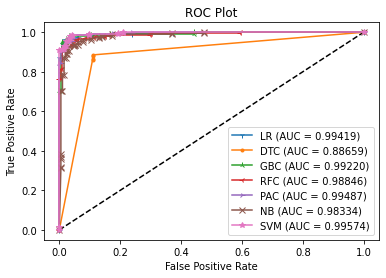

In [ ]:
roc_plot = plt.figure()
plt.plot([0,1],[0,1], 'k--')
plt.plot(lr_fpr, lr_tpr, marker='1', label='LR (AUC = %0.5f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DTC (AUC = %0.5f)' % dt_auc)
plt.plot(gb_fpr, gb_tpr, marker='2', label='GBC (AUC = %0.5f)' % gb_auc)
plt.plot(rf_fpr, rf_tpr, marker='3', label='RFC (AUC = %0.5f)' % rf_auc)
plt.plot(pac_fpr, pac_tpr, marker='4', label='PAC (AUC = %0.5f)' % pac_auc)
plt.plot(nb_fpr, nb_tpr, marker='x', label='NB (AUC = %0.5f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, marker='*', label='SVM (AUC = %0.5f)' % svm_auc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

roc_plot.savefig('roc2.9.23.pdf', format='pdf', bbox_inches = 'tight')

### Precision, Recall, F1-scores

In [ ]:
lr_prec = precision_score(y_test, pred_lr)
lr_rec = recall_score(y_test, pred_lr)
lr_f1 = f1_score(y_test, pred_lr)
print("LR Precision:", lr_prec)
print("LR Recall:", lr_rec)
print("LR F1-score", lr_f1)

LR Precision: 0.9757281553398058
LR Recall: 0.9617224880382775
LR F1-score 0.9686746987951808


In [ ]:
dtc_prec = precision_score(y_test, pred_dt)
dtc_rec = recall_score(y_test, pred_dt)
dtc_f1 = f1_score(y_test, pred_dt)
print("DTC Precision:", dtc_prec)
print("DTC Recall:", dtc_rec)
print("DTC F1-score", dtc_f1)

DTC Precision: 0.8960396039603961
DTC Recall: 0.8660287081339713
DTC F1-score 0.8807785888077859


In [ ]:
gbc_prec = precision_score(y_test, pred_gbc)
gbc_rec = recall_score(y_test, pred_gbc)
gbc_f1 = f1_score(y_test, pred_gbc)
print("GBC Precision:", gbc_prec)
print("GBC Recall:", gbc_rec)
print("GBC F1-score", gbc_f1)

GBC Precision: 0.9712918660287081
GBC Recall: 0.9712918660287081
GBC F1-score 0.9712918660287081


In [ ]:
rfc_prec = precision_score(y_test, pred_rfc)
rfc_rec = recall_score(y_test, pred_rfc)
rfc_f1 = f1_score(y_test, pred_rfc)
print("RFC Precision:", rfc_prec)
print("RFC Recall:", rfc_rec)
print("RFC F1-score", rfc_f1)

RFC Precision: 0.9653465346534653
RFC Recall: 0.9330143540669856
RFC F1-score 0.9489051094890512


In [ ]:
pac_prec = precision_score(y_test, pred_pac)
pac_rec = recall_score(y_test, pred_pac)
pac_f1 = f1_score(y_test, pred_pac)
print("PAC Precision:", pac_prec)
print("PAC Recall:", pac_rec)
print("PAC F1-score", pac_f1)

PAC Precision: 0.9752475247524752
PAC Recall: 0.9425837320574163
PAC F1-score 0.9586374695863746


In [29]:
nb_prec = precision_score(y_test, pred_mnb)
nb_rec = recall_score(y_test, pred_mnb)
nb_f1 = f1_score(y_test, pred_mnb)
print("NB Precision:", nb_prec)
print("NB Recall:", nb_rec)
print("NB F1-score", nb_f1)

NB Precision: 0.975
NB Recall: 0.9241706161137441
NB F1-score 0.948905109489051


In [ ]:
svm_prec = precision_score(y_test, pred_svm)
svm_rec = recall_score(y_test, pred_svm)
svm_f1 = f1_score(y_test, pred_svm)
print("SVM Precision:", svm_prec)
print("SVM Recall:", svm_rec)
print("SVM F1-score", svm_f1)

SVM Precision: 0.975609756097561
SVM Recall: 0.9569377990430622
SVM F1-score 0.9661835748792269


### Confusion Matrix

In [30]:
def generate_matrix(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  labels = ['Not Fake','Fake']
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted Label', fontsize=12)
  plt.ylabel('True Label', fontsize=12)
  plt.title('Confusion Matrix of ' + model_name, fontsize=12)
  plt.show()
  fig.savefig(model_name + '_cm' + '.pdf', format='pdf', bbox_inches='tight')

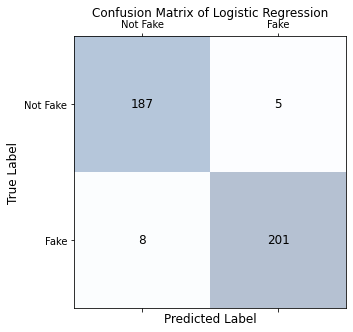

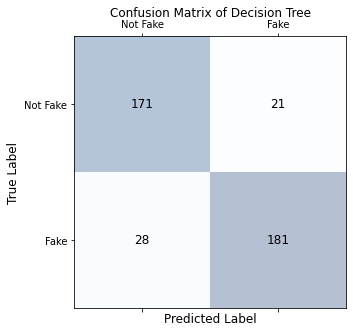

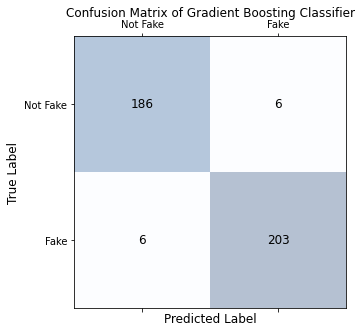

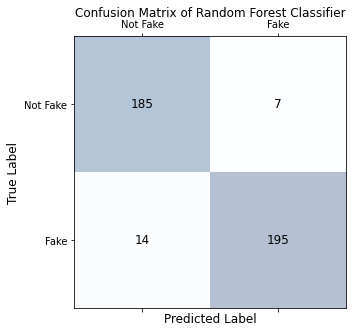

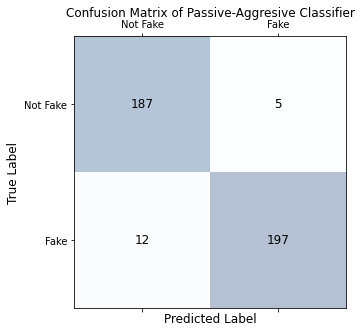

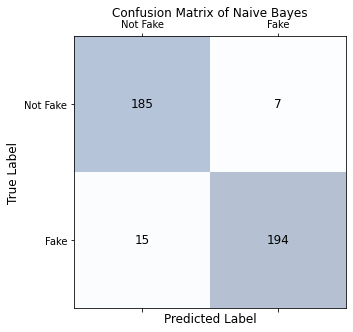

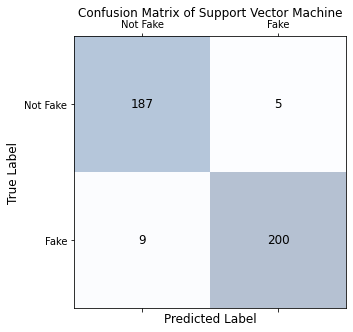

In [ ]:
generate_matrix(y_test, pred_lr, 'Logistic Regression')
generate_matrix(y_test, pred_dt, 'Decision Tree')
generate_matrix(y_test, pred_gbc, 'Gradient Boosting Classifier')
generate_matrix(y_test, pred_rfc, 'Random Forest Classifier')
generate_matrix(y_test, pred_pac, 'Passive-Aggresive Classifier')
#generate_matrix(y_test, pred_mnb, 'Naive Bayes')
generate_matrix(y_test, pred_svm, 'Support Vector Machine')

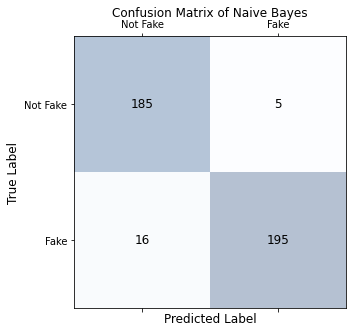

In [32]:
generate_matrix(y_test, pred_mnb, 'Naive Bayes')

# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 0:
        return "not Fake news"
    elif n == 1:
        return "Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_pac = pac.predict(new_xv_test)
    pred_mnb = mnb.predict(new_xv_test)
    pred_svm = svm.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nPAC Prediction: {} \nMNB Prediction: {} \nSVM Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                                                                                            output_lable(pred_DT[0]), 
                                                                                                                                                                            output_lable(pred_GBC[0]), 
                                                                                                                                                                            output_lable(pred_RFC[0]),
                                                                                                                                                                            output_lable(pred_pac[0]),
                                                                                                                                                                            output_lable(pred_mnb[0]),
                                                                                                                                                                            output_lable(pred_svm[0])))

In [ ]:
news = str(input())
manual_testing(news)

President ferdinand "bongbong" marcos jr.  in monday the signed sim card registration the action, first legislation enacted under he is administration.  The law aims to curb text scams and spam.       powered by adsparc the ceremonial signing were hold on malacañang taking senate president juan miguel zubiri, place speaker martin romualdez and other stakeholders standing to witnesses.    "i the commend legislators the originate place and the originate senate of coming upon taking that timely and necessary law.  It the is first legislative measured this successfully the pass approval the for bicameral panel for both houses the on 19th the congress," chief executive say, adding this such that law "has long achieved overdue. "  the "truly, legislation is moving to be welcome by prolific for our people, especially currently taking reports the for commission for various crimes using mobile phones, including proliferation for text scams and spam.  Indeed, the taking signing for that law, our